In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import emcee
import corner
import pandas as pd

def plot_error_ellipses(ax, X, S, color="k"):
    for n in range(len(X)):
        vals, vecs = np.linalg.eig(S[n])
        theta = np.degrees(np.arctan2(*vecs[::-1, 0]))
        w, h = 2 * np.sqrt(vals)
        ell = Ellipse(xy=X[n], width=w, height=h,
                      angle=theta, color=color, lw=0.5)
        ell.set_facecolor("none")
        ax.add_artist(ell)
    ax.plot(X[:, 0], X[:, 1], ".", color=color, ms=4)

def variance(array, iterator): # returns the variance of a datapoint within the array at position = iterator
    return (array[iterator]-np.mean(array))**2

def cov(array1,array2,iterator):
    return (array1[iterator]-np.mean(array1))*(array2[iterator]-np.mean(array2))

In [65]:
dfJingle = pd.read_csv("JINGLEMASTERDEC19.csv")
dfJingle = dfJingle.drop(44)
dfJingle.reset_index(inplace=True)
xColdDF = pd.read_csv("xColdFilt.csv")

In [75]:
dfJingle.columns.values
fname = "Dust3Param"

In [76]:
from itertools import product

# Generate the true coordinates of the data points.
N = len(dfJingle)
X = np.empty((N, 3))
X[:, 0] = dfJingle["MPA LBdec"] # x1
X[:, 1] = dfJingle["INCL"] # x2
X[:, 2] = dfJingle["logMDust"] # y

# Making the uncertainty matrix
S = np.zeros((N, 3, 3))
for n in range(N): # for each data point
    for (i,j) in product(range(3),range(3)):
        if i==j: # if along the diagonals, find the variance of X[n][i] - done!
            S[n][i][i]=variance(X[:,i],n)
        else: # else, find the covariance between X[n][i] and X[n][j] - done?
            S[n][i][j]=cov(X[:,i],X[:,j],n) 

In [77]:
print(S)

[[[ 6.45229161e-04  4.27245160e-01 -4.25567095e-03]
  [ 4.27245160e-01  2.82904800e+02 -2.81793652e+00]
  [-4.25567095e-03 -2.81793652e+00  2.80686868e-02]]

 [[ 2.08323143e-02 -1.50984864e+00  8.79710358e-02]
  [-1.50984864e+00  1.09428213e+02 -6.37581341e+00]
  [ 8.79710358e-02 -6.37581341e+00  3.71485521e-01]]

 [[ 3.75741554e-03  3.02846243e-01  4.17896336e-02]
  [ 3.02846243e-01  2.44092904e+01  3.36822834e+00]
  [ 4.17896336e-02  3.36822834e+00  4.64780500e-01]]

 ...

 [[ 5.72278696e-03  5.98991732e-01  4.74491515e-02]
  [ 5.98991732e-01  6.26951688e+01  4.96640005e+00]
  [ 4.74491515e-02  4.96640005e+00  3.93413558e-01]]

 [[ 2.42619076e-06  1.41339512e-02 -5.87906085e-04]
  [ 1.41339512e-02  8.23383637e+01 -3.42488978e+00]
  [-5.87906085e-04 -3.42488978e+00  1.42459353e-01]]

 [[ 1.48574300e-02  1.69664358e+00  5.48555932e-02]
  [ 1.69664358e+00  1.93748140e+02  6.26423209e+00]
  [ 5.48555932e-02  6.26423209e+00  2.02534093e-01]]]


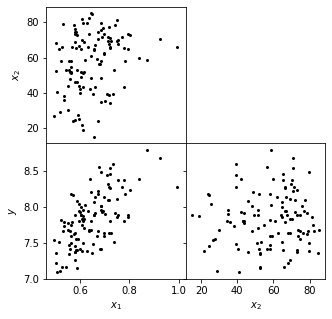

In [78]:
# print(X_true)

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
    
#     ax.set_xlim(-7, 17)
#     ax.set_ylim(-7, 17)
pointsize=4
# Make the plots look nicer...
ax = axes[0, 1]
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

ax = axes[0, 0]
ax.scatter(X_true[:,0],X_true[:,1],c="black",s=pointsize)
ax.set_ylabel("$x_2$")
ax.set_xticklabels([])
ax = axes[1, 0]
ax.scatter(X_true[:,0],X_true[:,2],c="black",s=pointsize)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$")
ax = axes[1, 1]
ax.scatter(X_true[:,1],X_true[:,2],c="black",s=pointsize)
ax.set_xlabel("$x_2$")
ax.set_yticklabels([])
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("True_Stuff.png",dpi=100)
plt.show()

In [79]:
# print(np.cov(X_true[:,0],X_true[:,1]),"\n")
# np.cov(X_true[:,0],X_true[:,2]),"\n",
# np.cov(X_true[:,1],X_true[:,2]))
# for i in range(len(X_true)):
#     print(X_true[i,0],X_true[i,1],X_true[i,2],i)

In [80]:
# # Plot the simulated dataset.
# fig, axes = plt.subplots(2, 2, figsize=(5, 5))
# for xi, yi in product(range(3), range(3)):
#     if yi <= xi:
#         continue
#     ax = axes[yi-1, xi]
#     plot_error_ellipses(ax, X[:, [xi, yi]],
#                         S[:,
#                           [[xi, xi], [yi, yi]],
#                           [[xi, yi], [xi, yi]]])
    
# #     ax.set_xlim(-7, 17)
# #     ax.set_ylim(-7, 17)

# # Make the plots look nicer...
# ax = axes[0, 1]
# ax.set_frame_on(False)
# ax.set_xticks([])
# ax.set_yticks([])

# ax = axes[0, 0]
# ax.set_ylabel("$x_2$")
# ax.set_xticklabels([])
# ax = axes[1, 0]
# ax.set_xlabel("$x_1$")
# ax.set_ylabel("$y$")
# ax = axes[1, 1]
# ax.set_xlabel("$x_2$")
# ax.set_yticklabels([])
# fig.subplots_adjust(wspace=0, hspace=0)

# plt.show()

In [81]:
def plot_corner_full2(samples_input, labels): # plots the corner plot
#     samples_input[2,:] = np.exp(samples_input[2,:])
    fig, ax = plt.subplots(nrows = 4, ncols = 4, squeeze=False, figsize=(8,8))
    corner.corner(samples_input,
                  labels=labels,
                  truths=(np.median(samples_input[:,0]),
                  np.median(samples_input[:, 1]),
                  np.median(samples_input[:, 2]),
                  np.median(np.log10(samples_input[:, 3]))),
                  truth_color="k",
                  quantiles=[0.16, 0.84], 
                  show_titles=True, 
                  title_kwargs={"fontsize": 12},
                  fig=fig)
    fig.set_size_inches(w=10,h=10)
    plt.savefig(fname+"_corner.png", dpi=100)
    plt.show()

def log_prob_D(params):
    m = params[:2]
    b, log_lambda = params[2:]
    v = np.append(-m, 1.0)
    
    # Enforce the log-uniform prior on lambda. 
    if not -5.0 < log_lambda < 5.0:
        return -np.inf
        
    # Compute \Sigma^2 and \Delta.
    Sigma2 = np.dot(np.dot(S, v), v) + np.exp(2*log_lambda)
    Delta = np.dot(X, v) - b
    
    # Compute the log likelihood up to a constant.
    ll = -0.5 * np.sum(Delta**2 / Sigma2 + np.log(Sigma2))
    return ll

In [82]:
nwalkers = 64 # experiment with this
ndim=4

m_guess = [4,0.02]
b_guess = 5
lambda_guess = 2

stepnum = 10**6

# Run the MCMC.
sampler_D = emcee.EnsembleSampler(nwalkers, ndim, log_prob_D)
p0 = np.append(m_guess, [b_guess, np.log(lambda_guess)])
p0 = p0 + 1e-4 * np.random.randn(nwalkers, len(p0))
pos, _, _ = sampler_D.run_mcmc(p0, 0.05*stepnum)
sampler_D.reset()
sampler_D.run_mcmc(pos, stepnum,progress=True)
samples_D = sampler_D.flatchain

param_labels=["$m_1$", "$m_2$", "b", "$\ln\lambda$"]

tau = sampler_D.get_autocorr_time(c=4)
nsamples = len(samples_D)
print("{0:.0f} independent samples of m1".format(nsamples / tau[0]))
print("{0:.0f} independent samples of m2".format(nsamples / tau[1]))
print("{0:.0f} independent samples of b".format(nsamples / tau[2]))
print("{0:.0f} independent samples of ln(lambda)".format(nsamples / tau[3]))

/Users/sean/anaconda3/lib/python3.6/site-packages/emcee-3.0.0-py3.6.egg/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
100%|██████████| 1000000/1000000 [1:16:03<00:00, 219.14it/s] 


241904 independent samples of m1
152696 independent samples of m2
327680 independent samples of b
529561 independent samples of ln(lambda)


/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


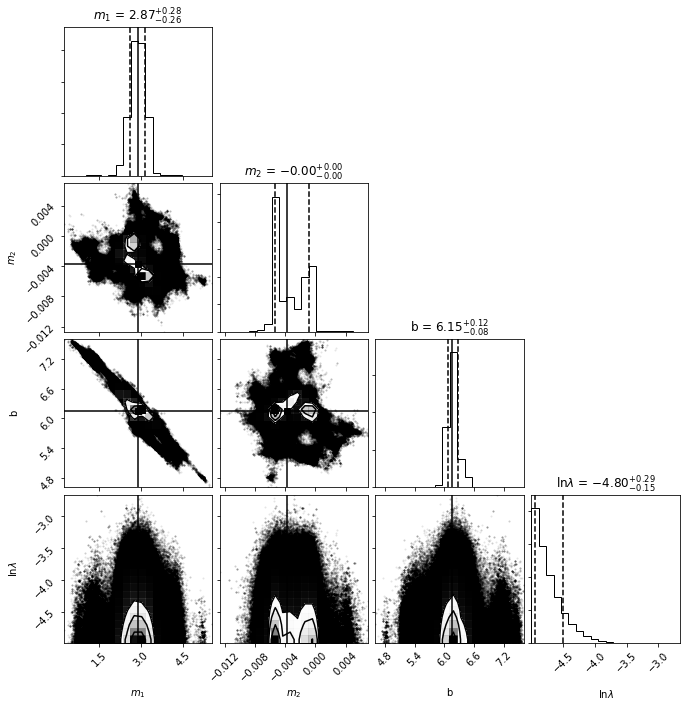

In [83]:
plot_corner_full2(samples_D,param_labels)